In [319]:
# BBC News Website research project
# Part of Steve Parks's journalism research
# https://github.com/steveparks/journalism-research

# Wordcloud of a year on the BBC News website

# import necessary modules 
import pandas as pd
import numpy as np
import sqlite3 as sql
from wordcloud import WordCloud, STOPWORDS # https://github.com/amueller/word_cloud
import matplotlib.pyplot as plt
import string
import collections
from tabulate import tabulate

%matplotlib inline

In [ ]:
# Set up our notebook with data

# Load the latest version of the headlines raw data from https://github.com/steveparks/journalism-research/tree/main/bbc-news
headlines = pd.read_csv('https://raw.githubusercontent.com/steveparks/journalism-research/main/bbc-news/bbcnews-headlines-rawdata.csv', index_col=0)

# Ensure the column headers are formatted correctly, as the scraper uses hyphens
headlines.columns = headlines.columns.map(lambda x : x.replace("-", "_"))

# Connect to, or set up, a SQLite database
conn = sql.connect('headlines.db')

# Import our headline data to a table in the DB. Replace any existing table
headlines.to_sql('headlines', conn, if_exists='replace')

In [312]:
# Select the headlines from the year between 28th July 2020 and 27th July 2021
query = '''
SELECT headline 
FROM headlines 
WHERE "time_scraped" 
BETWEEN "2020-07-28" 
AND "2021-07-27"
'''
headlines = pd.read_sql_query(query, conn, index_col=None, parse_dates=["time_scraped"])
print(headlines)

                                                 headline
0            UK changes travel advice for Spanish islands
1                 MI6 apologises for court 'interference'
2            Toddler injured after Poplar flat block fall
3       Top civil servant criticises 'sniping' at offi...
4        Facebook takes the EU to court over privacy spat
...                                                   ...
125344               GB win three golds on 'Magic Monday'
125345       More pinged workers to get daily Covid tests
125346      Man guilty of murdering teen over abuse claim
125347      Man guilty of murdering teen over abuse claim
125348      US combat forces to leave Iraq by end of year

[125349 rows x 1 columns]


In [301]:
# Build a string of all the headlines
headlines_string = " ".join(headline for headline in headlines.headline) 

print ("There are {} words in all headline slots combined.".format(len(headlines_string)))
print ("Example (first 1000 characters): {}".format(headlines_string[0:1000]))

There are 5899644 words in all headline slots combined.
Example (first 1000 characters): UK changes travel advice for Spanish islands MI6 apologises for court 'interference' Toddler injured after Poplar flat block fall Top civil servant criticises 'sniping' at officials Facebook takes the EU to court over privacy spat Hamilton deletes vaccine conspiracy theory post Spain races to save tourism as cases surge Shapps to return early from Spain to quarantine Vouchers and bikes on NHS to boost active travel WHO: Covid-19 the 'most severe' crisis we've faced St Bernard dog back home after mountain rescue Cleveland to host first US presidential debate Cleveland to host first US presidential debate Ethnic minorities 'more likely to get Covid fines' UK changes travel advice for Spanish islands Lecturer jailed in Iran 'moved to remote prison' Toddler injured after London flat block fall Kelp found off Scotland dates back 16,000 years Top civil servant criticises 'sniping' at officials Facebook t

In [302]:
# Clean text

# Convert it all to lowercase. Important for later when we count words
headlines_string = headlines_string.lower()

# Remove punctuation
headlines_string = headlines_string.translate(str.maketrans('', '', string.punctuation))

print ("There are {} words in all headline slots combined.".format(len(headlines_string)))
print ("Example (first 1000 characters): {}".format(headlines_string[0:1000]))

There are 5780898 words in all headline slots combined.
Example (first 1000 characters): uk changes travel advice for spanish islands mi6 apologises for court interference toddler injured after poplar flat block fall top civil servant criticises sniping at officials facebook takes the eu to court over privacy spat hamilton deletes vaccine conspiracy theory post spain races to save tourism as cases surge shapps to return early from spain to quarantine vouchers and bikes on nhs to boost active travel who covid19 the most severe crisis weve faced st bernard dog back home after mountain rescue cleveland to host first us presidential debate cleveland to host first us presidential debate ethnic minorities more likely to get covid fines uk changes travel advice for spanish islands lecturer jailed in iran moved to remote prison toddler injured after london flat block fall kelp found off scotland dates back 16000 years top civil servant criticises sniping at officials facebook takes the eu to c

In [303]:
# Split the text into words
headline_words = headlines_string.split()

print ("There are {} words in all headline slots combined.".format(len(headline_words)))
print ("Example (first 100 words): {}".format(headline_words[0:100]))

There are 934951 words in all headline slots combined.
Example (first 100 words): ['uk', 'changes', 'travel', 'advice', 'for', 'spanish', 'islands', 'mi6', 'apologises', 'for', 'court', 'interference', 'toddler', 'injured', 'after', 'poplar', 'flat', 'block', 'fall', 'top', 'civil', 'servant', 'criticises', 'sniping', 'at', 'officials', 'facebook', 'takes', 'the', 'eu', 'to', 'court', 'over', 'privacy', 'spat', 'hamilton', 'deletes', 'vaccine', 'conspiracy', 'theory', 'post', 'spain', 'races', 'to', 'save', 'tourism', 'as', 'cases', 'surge', 'shapps', 'to', 'return', 'early', 'from', 'spain', 'to', 'quarantine', 'vouchers', 'and', 'bikes', 'on', 'nhs', 'to', 'boost', 'active', 'travel', 'who', 'covid19', 'the', 'most', 'severe', 'crisis', 'weve', 'faced', 'st', 'bernard', 'dog', 'back', 'home', 'after', 'mountain', 'rescue', 'cleveland', 'to', 'host', 'first', 'us', 'presidential', 'debate', 'cleveland', 'to', 'host', 'first', 'us', 'presidential', 'debate', 'ethnic', 'minorities', 'mo

In [304]:
# Build a list of non-valuable words to remove, like and/they/he/she/
# Stopwords list can be seen here https://github.com/amueller/word_cloud/blob/master/wordcloud/stopwords
stopwords = set(STOPWORDS) 
# Add some custom stopwords
stopwords.update(["said", "says", "will", "takes", "moved", "nearly", "day", "years", "amid"])

headline_words = [word for word in headline_words if word not in stopwords]

print ("There are {} words in all headline slots combined.".format(len(headline_words)))
print ("Example (first 100 words): {}".format(headline_words[0:100]))

There are 719407 words in all headline slots combined.
Example (first 100 words): ['uk', 'changes', 'travel', 'advice', 'spanish', 'islands', 'mi6', 'apologises', 'court', 'interference', 'toddler', 'injured', 'poplar', 'flat', 'block', 'fall', 'top', 'civil', 'servant', 'criticises', 'sniping', 'officials', 'facebook', 'eu', 'court', 'privacy', 'spat', 'hamilton', 'deletes', 'vaccine', 'conspiracy', 'theory', 'post', 'spain', 'races', 'save', 'tourism', 'cases', 'surge', 'shapps', 'return', 'early', 'spain', 'quarantine', 'vouchers', 'bikes', 'nhs', 'boost', 'active', 'travel', 'covid19', 'severe', 'crisis', 'weve', 'faced', 'st', 'bernard', 'dog', 'back', 'home', 'mountain', 'rescue', 'cleveland', 'host', 'first', 'us', 'presidential', 'debate', 'cleveland', 'host', 'first', 'us', 'presidential', 'debate', 'ethnic', 'minorities', 'likely', 'covid', 'fines', 'uk', 'changes', 'travel', 'advice', 'spanish', 'islands', 'lecturer', 'jailed', 'iran', 'remote', 'prison', 'toddler', 'injured

In [323]:
#  Count the frequency of use of each word
words_frequency = collections.Counter(headline_words)

# Build a dictionary type that we can pass to wordcloud, with just the most common 1000 words
words_frequency_dict = dict(words_frequency.most_common(1000))

# Display a list of the top 50 most frequent words, in markdown that we can copy to site
words_frequency_df = pd.DataFrame(words_frequency.most_common(50),
                                     columns=["Word", "Mentions"])
words_frequency_df.index = np.arange(1,len(words_frequency_df)+1) # adjust the index so top position is 1
print("Top 50 words in headlines")
print(words_frequency_df.to_markdown())

Top 50 words in headlines
|    | Word        |   Mentions |
|---:|:------------|-----------:|
|  1 | covid       |      12050 |
|  2 | uk          |       7615 |
|  3 | us          |       4524 |
|  4 | new         |       4275 |
|  5 | coronavirus |       3888 |
|  6 | england     |       3847 |
|  7 | vaccine     |       3739 |
|  8 | lockdown    |       3728 |
|  9 | pm          |       3401 |
| 10 | police      |       3120 |
| 11 | trump       |       3052 |
| 12 | update      |       2519 |
| 13 | dies        |       2483 |
| 14 | man         |       2417 |
| 15 | rules       |       2372 |
| 16 | first       |       2296 |
| 17 | biden       |       2187 |
| 18 | virus       |       1738 |
| 19 | eu          |       1711 |
| 20 | cases       |       1664 |
| 21 | home        |       1664 |
| 22 | covid19     |       1554 |
| 23 | death       |       1547 |
| 24 | nhs         |       1418 |
| 25 | wales       |       1398 |
| 26 | people      |       1396 |
| 27 | deal        |  

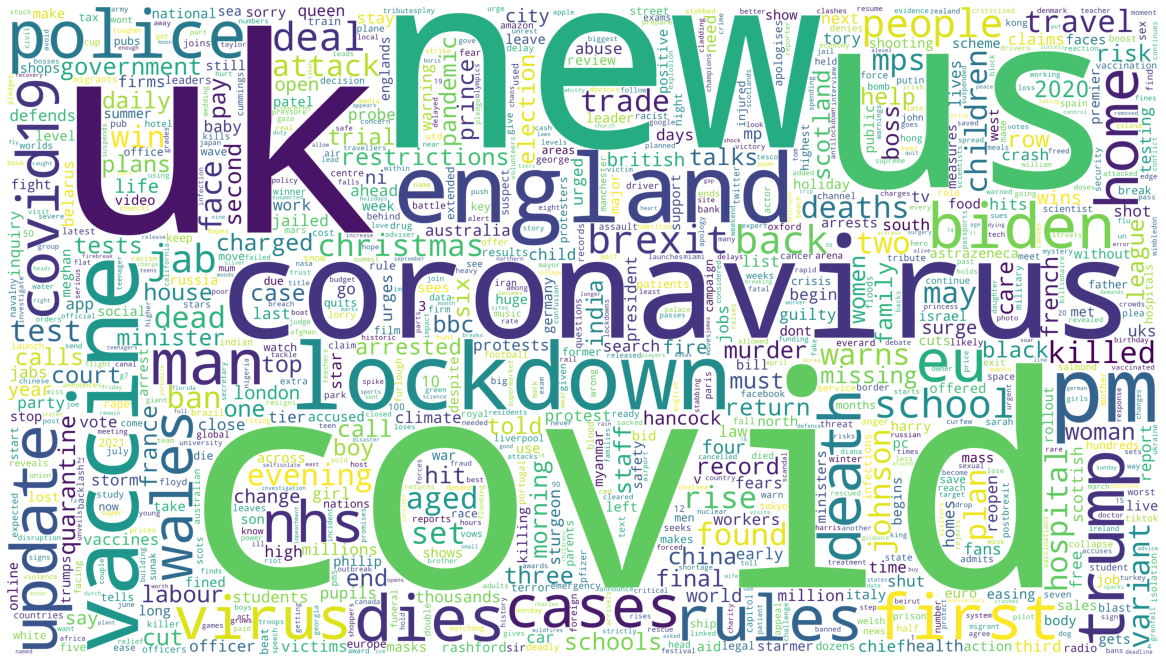

In [306]:
wordcloud = WordCloud(width = 6400, height = 3600, 
                background_color ='white', 
                max_words=1000,
                relative_scaling=0.21,
                min_font_size = 10).generate_from_frequencies(words_frequency_dict)

# plot the WordCloud image                        
plt.figure(figsize = (16,9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()